In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, cheb2poly
import sys
# sys.path.insert(0, '../seal_wrapper/')
# from seal_wrapper import EA

In [16]:
x = np.linspace(-4.9, 5.0, 100)
x

array([-4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. , -3.9,
       -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8,
       -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7,
       -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6,
       -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,
        1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,
        2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,
        3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,
        5. ])

In [17]:
def relu(z):
    return np.maximum(0, z)

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [19]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

In [20]:
y = relu(x)

In [21]:
coeffs_cheb_4 = chebfit(x, y, deg=4)
coeffs_cheb_3 = chebfit(x, y, deg=3)

In [22]:
coeffs_4 = cheb2poly(coeffs_cheb_4)
coeffs_3 = cheb2poly(coeffs_cheb_3)
coeffs_4

array([ 2.92675649e-01,  4.97655468e-01,  1.64128176e-01,  2.18968949e-04,
       -3.28453424e-03])

In [23]:
data_4 = x[:, None] ** np.arange(coeffs_4.shape[0])
data_3 = x[:, None] ** np.arange(coeffs_3.shape[0])

In [24]:
relu_approx_4 = data_4.dot(coeffs_4[:, None])
relu_approx_3 = data_3.dot(coeffs_3[:, None])
#relu_approx = data.dot(np.array([0.308, 0.465, 0.149, 0.00827, -0.000987]).reshape(-1, 1))

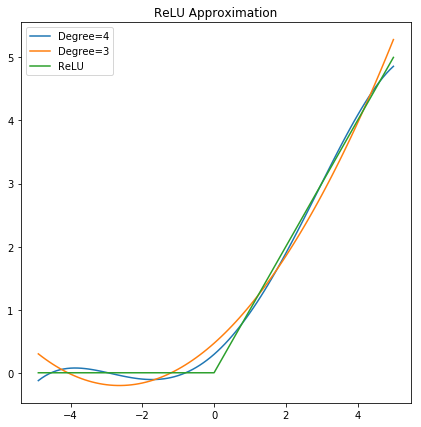

In [25]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx_4)
plt.plot(x, relu_approx_3)
plt.plot(x, y)
plt.legend(['Degree=4', 'Degree=3', 'ReLU'])
plt.title('ReLU Approximation')
#plt.savefig('relu-approx.pdf')
plt.show()


In [20]:
x_enc = EA(x[:, None], True)

In [21]:
x_relu = x_enc.relu()

In [ ]:
relu_vals = x_relu.values()

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)
plt.plot(x, relu_vals)